<a href="https://colab.research.google.com/github/Ahmad-Zuber/futurefirstassignment.github.io/blob/main/Zuber_Ahmad_Future_First_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on German 10 YR Bund Futures Historical Data.

In [35]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns


##**1. Uploading the Data.**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Almax/Fture first/German 10 YR Bund Futures Historical Data.csv')

In [38]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 15, 2022",144.61,142.73,145.51,142.25,1.29M,0.71%
1,"Jun 14, 2022",143.59,144.65,145.58,142.29,1.26M,-1.10%
2,"Jun 13, 2022",145.18,146.71,147.19,144.19,1.10M,-1.22%
3,"Jun 10, 2022",146.98,147.74,148.51,146.61,956.29K,-0.55%
4,"Jun 09, 2022",147.80,148.69,149.43,147.32,1.04M,-0.79%


In [39]:
df.shape

(1139, 7)

In [40]:
df.describe()

,Price,Open,High,Low
count,1139.000000,1139.000000,1139.000000,1139.000000
mean,168.579350,168.583205,168.954170,168.196365
std,6.983063,6.962133,6.940679,6.999907
min,143.590000,142.730000,145.510000,142.250000
25%,162.710000,162.675000,163.045000,162.430000
50%,170.750000,170.750000,171.150000,170.310000
75%,174.270000,174.250000,174.630000,173.900000
max,179.440000,179.390000,179.670000,179.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1139 non-null   object 
 1   Price     1139 non-null   float64
 2   Open      1139 non-null   float64
 3   High      1139 non-null   float64
 4   Low       1139 non-null   float64
 5   Vol.      1139 non-null   object 
 6   Change %  1139 non-null   object 
dtypes: float64(4), object(3)
memory usage: 62.4+ KB


In [42]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

##**2. Move the 'Price' columns after 'Low' column but before 'Vol.' and 'Change%' Columns**

In [43]:
# Make a list of columns
col = df.columns.tolist()

In [44]:
col

['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

In [45]:
col = list(col[:1]) + list(col[2:5]) + list(col[1:2]) + list(col[5:7])      # shifting columns as required

In [46]:
col

['Date', 'Open', 'High', 'Low', 'Price', 'Vol.', 'Change %']

In [47]:
df = df[col]          #Reordered the dataframe

In [48]:
df.head()             # New dataframe as per requirements

,Date,Open,High,Low,Price,Vol.,Change %
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%


##**3. Rename the 'Price' columns to 'Close'.**

In [49]:
# Renaming Price column to Close
df = df.rename(columns={'Price': 'Close'})

In [50]:
df.head()

,Date,Open,High,Low,Close,Vol.,Change %
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%


##**4. Need to calculate the Average True Range (ATR) from the dataset.**

Average True Range (ATR) is the average of true ranges over the specified period. ATR measures volatility, taking into account any gaps in the price movement. Typically, the ATR calculation is based on 14 periods, which can be intraday, daily, weekly, or monthly.

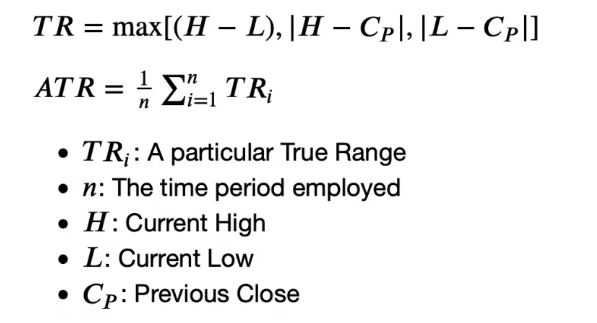

In [51]:
df.head(10)

,Date,Open,High,Low,Close,Vol.,Change %
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%
5,"Jun 08, 2022",149.15,149.30,148.87,148.98,7.61K,-0.37%
6,"Jun 07, 2022",148.99,149.62,148.68,149.53,131.19K,0.39%
7,"Jun 06, 2022",149.75,150.13,148.91,148.95,578.36K,-0.45%
8,"Jun 03, 2022",150.13,150.35,149.57,149.63,875.62K,-0.42%
9,"Jun 02, 2022",150.99,151.09,150.06,150.26,1.14M,-0.50%


Date sort in descending order:

In [52]:
high_low = df['High'] - df['Low'] 
high_close = (df['High'] - df['Close']).abs()
low_close = (df['Low'] - df['Close']).abs()
ranges = pd.concat([high_low, high_close, low_close],axis=1)


In [53]:
tr = np.max(ranges, axis=1)
tr

0       3.26
1       3.29
2       3.00
3       1.90
4       2.11
        ... 
1134    0.65
1135    0.37
1136    0.49
1137    0.62
1138    0.60
Length: 1139, dtype: float64

In [54]:
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

In [55]:
atr = wwma(tr,1139)

In [56]:
atr

0       3.260000
1       3.260026
2       3.259798
3       3.258604
4       3.257596
          ...   
1134    1.659145
1135    1.658013
1136    1.656988
1137    1.656077
1138    1.655150
Length: 1139, dtype: float64

In [57]:
df['ATR'] = atr
df.head(5)

,Date,Open,High,Low,Close,Vol.,Change %,ATR
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%,3.260000
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%,3.260026
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%,3.259798
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%,3.258604
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%,3.257596


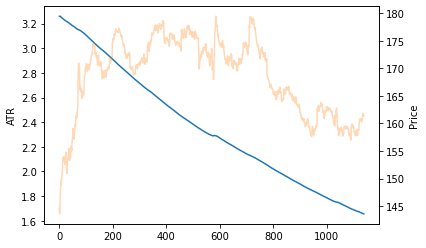

In [58]:
fig, ax = plt.subplots()
df['ATR'].plot(ax=ax)
ax2 = df['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")
plt.show()

##**5. Moving Standard Deviation of both Close and ATR.**

Moving Standard Deviation (MSTD)
The moving standard deviation is a measure of market volatility. It makes no predictions of market direction, but it may serve as a confirming indicator. You specify the number of periods to use, and the study computes the standard deviation of prices from the moving average of the prices.


PARAMETERS:
Period (20) - the number of bars, or interval, used to calculate the study.

COMPUTATION:

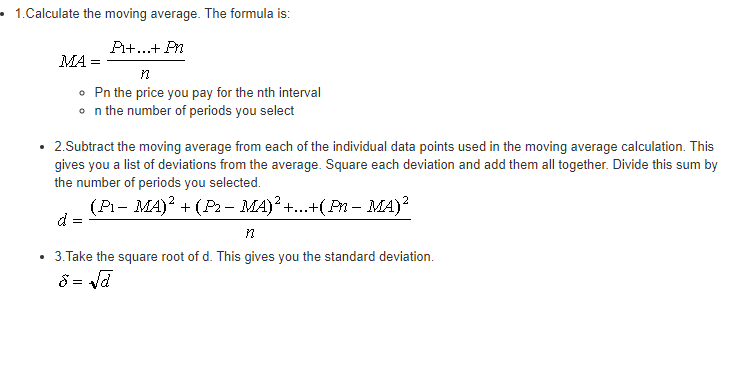


## Moving Average Deviation for Close Price.

In [59]:
# using .to_frame() to convert pandas series
# into dataframe.
df_new = df
df_new = df['Close'].to_frame()

df['MA_Close'] = df_new['Close'].ewm(1139).mean()   # Moving average (MA) using exponentional moving average (ewm)
df.head(5)


,Date,Open,High,Low,Close,Vol.,Change %,ATR,MA_Close
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%,3.260000,144.610000
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%,3.260026,144.099776
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%,3.259798,144.460167
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%,3.258604,145.090955
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%,3.257596,145.633715


In [60]:
ma_close = ((df['Close']-df['MA_Close'])**2).abs()
df['Dev'] = ma_close.ewm(1139).mean()
df['MAD_close'] = df['Dev']**(1/2)       # Moving Average Deviation using formula square root of df['Dev']
df = df.drop(columns=['Dev','MA_Close'], axis = 1)

In [61]:
df.head()

,Date,Open,High,Low,Close,Vol.,Change %,ATR,MAD_close
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%,3.260000,0.000000
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%,3.260026,0.360545
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%,3.259798,0.509407
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%,3.258604,1.042993
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%,3.257596,1.345396


## Moving Average Deviation of 'ATR' price.

In [62]:
# using .to_frame() to convert pandas series
# into dataframe.
df_new = df
df_new = df['ATR'].to_frame()

df['MA_ATR'] = df_new['ATR'].ewm(1139).mean()   # Moving average (MA) using exponentional moving average (ewm)
df.head(5)


,Date,Open,High,Low,Close,Vol.,Change %,ATR,MAD_close,MA_ATR
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%,3.260000,0.000000,3.260000
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%,3.260026,0.360545,3.260013
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%,3.259798,0.509407,3.259941
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%,3.258604,1.042993,3.259607
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%,3.257596,1.345396,3.259204


In [63]:
ma_atr = ((df['Close']-df['MA_ATR'])**2).abs()
df['Dev'] = ma_atr.ewm(1139).mean()
df['MAD_ATR'] = df['Dev']**(1/2)       # Moving Average Deviation for ATR using formula square root of df['Dev']
df = df.drop(columns=['Dev','MA_ATR'], axis = 1)

In [64]:
df.head()

,Date,Open,High,Low,Close,Vol.,Change %,ATR,MAD_close,MAD_ATR
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%,3.260000,0.000000,141.350000
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%,3.260026,0.360545,140.840693
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%,3.259798,0.509407,141.201715
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%,3.258604,1.042993,141.836410
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%,3.257596,1.345396,142.382352


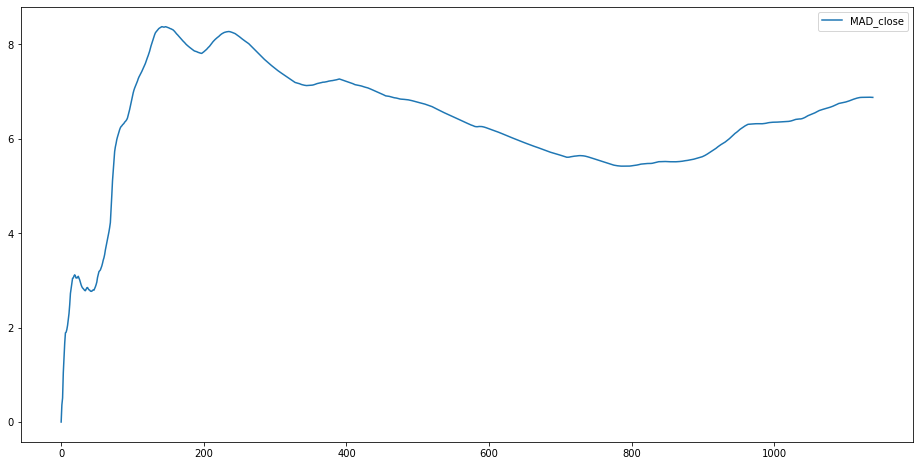

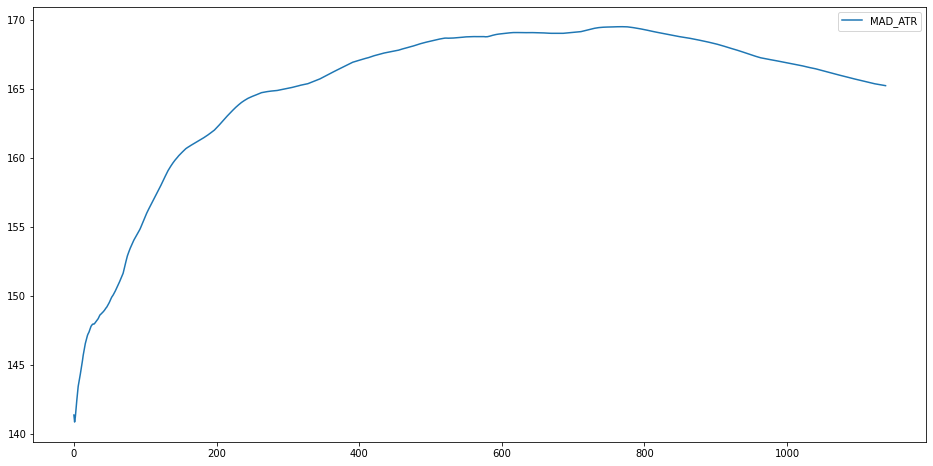

In [65]:
# plotting Close price and ATR
# using .plot() method
df[['MAD_close']].plot(label='df',figsize=(16, 8))
df[['MAD_ATR']].plot(label='df',figsize=(16, 8))

#6. Candelstick Chart

Candlestick charts are used by traders to determine possible price movement based on past patterns.
Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.
Many algorithms are based on the same price information shown in candlestick charts.
Trading is often dictated by emotion, which can be read in candlestick charts.

In [66]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
fig.update_layout(
    title='The Great Recession',
    yaxis_title='Stock',
    )

fig.show()

